In [3]:
!pip install seaborn -q


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import json
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from collections import defaultdict
pd.set_option("max_colwidth", None)


In [13]:
with open("/Users/n.valieva/Downloads/full_results_rugpt3small.json") as f:
    data = json.load(f)

In [14]:
data = pd.DataFrame(data)

In [15]:
data.head()

,id,text,text_rus,perplexity
0,0_0,Hello\n,Привет\n,147517.750000
1,0_1,"Hello, what would you like to talk about?","Привет, о чём бы ты хотел поговорить?",79.524506
2,0_2,I am having a lot of anxiety about quitting my current job. It is too stressful but pays well\n,"У меня много тревог из-за того, что я ухожу с текущей работы. Это слишком стрессово, но хорошо платят\n",80.749954
3,0_3,What makes your job stressful for you?,Что делает твою работу стрессовой для тебя?,136.674347
4,0_4,I have to deal with many people in hard financial situations and it is upsetting \n,"Мне приходится иметь дело со многими людьми в сложных финансовых ситуациях, и это расстраивает\n",59.763260


In [16]:
data["text_len"] = data.text_rus.apply(lambda x: len(x.split()))
data["perplexity_log"] = data.perplexity.apply(lambda x: np.log(x))

In [17]:
data.text_len.describe()

count    38365.000000
mean        13.735671
std         11.216333
min          1.000000
25%          6.000000
50%         11.000000
75%         18.000000
max        151.000000
Name: text_len, dtype: float64

In [18]:
data.perplexity_log.describe()

count    38365.000000
mean         5.244102
std          1.925209
min          2.188075
25%          4.081689
50%          4.751866
75%          5.773474
max         20.926205
Name: perplexity_log, dtype: float64

<Axes: >

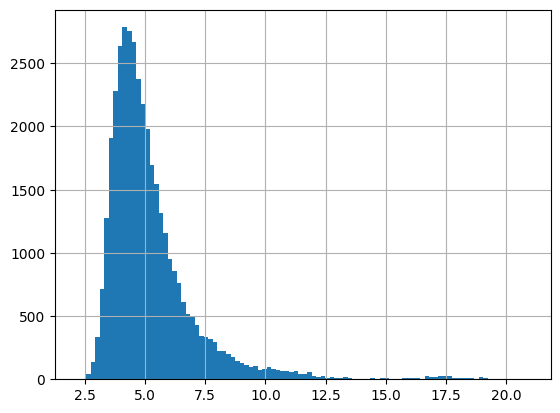

In [19]:
data.perplexity_log.hist(bins=100)

(0.0, 20.0)

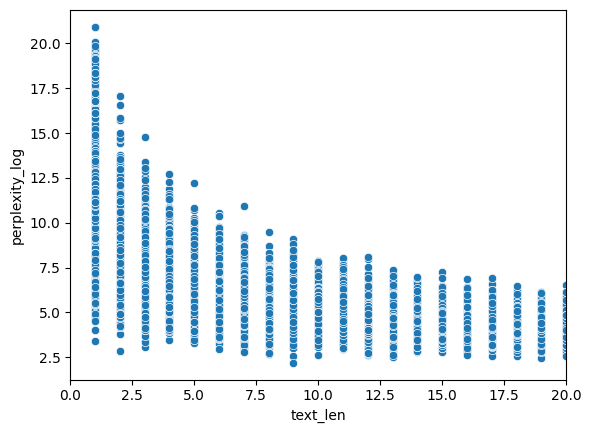

In [20]:
sns.scatterplot(data=data, x="text_len", y="perplexity_log")
plt.xlim(0,20)

<Axes: >

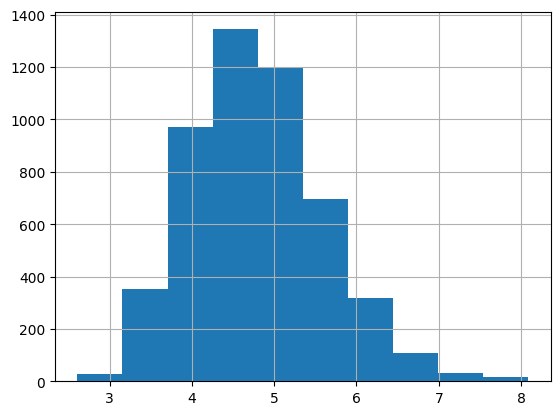

In [21]:
data[(data.text_len >=10) & (data.text_len <=12)].perplexity_log.hist()

In [22]:
data[(data.text_len >=10) & (data.text_len <=12)].perplexity_log.describe()

count    5061.000000
mean        4.794988
std         0.803878
min         2.609831
25%         4.222119
50%         4.728067
75%         5.292323
max         8.087142
Name: perplexity_log, dtype: float64

In [31]:
data["cat"] = pd.qcut(data.text_len, [x*0.1 for x in range(0,11,)])

In [24]:
data.cat.value_counts()

cat
(0.999, 3.0]     4508
(5.0, 7.0]       4184
(3.0, 5.0]       4040
(7.0, 9.0]       3882
(20.0, 27.0]     3857
(13.0, 16.0]     3826
(16.0, 20.0]     3787
(27.0, 151.0]    3770
(9.0, 11.0]      3424
(11.0, 13.0]     3087
Name: count, dtype: int64

In [29]:
data[((data.text_len >=10)) & (data.perplexity_log<5.3)].sort_values("perplexity")[-20:]

,id,text,text_rus,perplexity,text_len,perplexity_log,cat
26438,894_24,Who said you cannot have the cake and eat it all LOL\n,"Кто сказал, что ты не можешь получить торт и съесть его весь? ЛОЛ\n",199.593307,13,5.296282,"(11.0, 13.0]"
36672,1239_25,"That's true, it's working towards an end goal of feeling like myself again. You are right. \n","Это верно, это работа над конечной целью — снова почувствовать себя собой. Ты прав. \n",199.618820,14,5.296410,"(13.0, 16.0]"
19396,642_35,Anything that will help me with my anxiety is worth trying at the moment.,"Всё, что поможет мне с тревогой, стоит попробовать в данный момент.",199.646713,11,5.296549,"(9.0, 11.0]"
9493,298_45,I think I will text her and let her know I'm sending a gift card....maybe she will respond.\n,"Я думаю, напишу ей и скажу, что шлю ей карту-подарок....возможно, она ответит.\n",199.679352,12,5.296713,"(11.0, 13.0]"
32987,1107_26,If I needed a heart transplant tomorrow it would be free :D,"Если бы мне завтра потребовалась пересадка сердца, это было бы бесплатно :D",199.682129,12,5.296727,"(11.0, 13.0]"
12392,394_6,"she took me to go see the man, the man even gave us relationship advice\n","она взяла меня, чтобы посмотреть на этого мужчину, и он даже дал нам советы по отношениям\n",199.727921,16,5.296956,"(13.0, 16.0]"
34608,1162_31,Anytime. Stay safe and live well. -KJ the nurse,В любое время. Будь осторожен и живи на полную. -Сестра КЖ,199.741730,11,5.297025,"(9.0, 11.0]"
36902,1246_3,i mean i am okay other than my job situation but relatively i am alright\n,"я в порядке, кроме ситуации с работой, но в целом всё хорошо\n",199.840332,12,5.297519,"(11.0, 13.0]"
3526,112_21,Are you working in such a role? I doubt my qualifications translate THAT well haha\n,"Ты работаешь в такой роли? Я сомневаюсь, что мои квалификации настолько хорошо подходят, ха-ха\n",199.876358,14,5.297699,"(13.0, 16.0]"
8343,263_6,That person is very smart and very rice. So she affected with him,Этот человек очень умный и успешный. Поэтому она впечатлена им.,199.920486,10,5.297920,"(9.0, 11.0]"


In [30]:
data[((data.text_len >=10)) & (data.perplexity_log<5.3)].sort_values("perplexity").shape

(19609, 7)

In [32]:
category_stats = data.groupby('cat')['perplexity_log'].agg(['mean', 'std']).reset_index()

/var/folders/d0/c99842ks6hs09b_yrxt8knqr0000gp/T/ipykernel_81795/4056067881.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_stats = data.groupby('cat')['perplexity_log'].agg(['mean', 'std']).reset_index()


In [33]:
category_stats

,cat,mean,std
0,"(0.999, 3.0]",8.600096,3.083117
1,"(3.0, 5.0]",6.243942,1.257302
2,"(5.0, 7.0]",5.554681,1.043685
3,"(7.0, 9.0]",5.147428,0.888416
4,"(9.0, 11.0]",4.847351,0.821831
5,"(11.0, 13.0]",4.648329,0.734904
6,"(13.0, 16.0]",4.445164,0.654322
7,"(16.0, 20.0]",4.255436,0.594145
8,"(20.0, 27.0]",4.053556,0.525734
9,"(27.0, 151.0]",3.784697,0.461551


In [34]:
data = data.merge(category_stats, on='cat', how='left')

In [41]:
threshold_multiplier = 3.0

In [42]:
data['threshold'] = data['mean'] + threshold_multiplier * data['std']

In [43]:
data['is_bad_translation'] = data['perplexity_log'] > data['threshold']

In [44]:
data[data.is_bad_translation == True]

,id,text,text_rus,perplexity,text_len,perplexity_log,cat,mean,std,threshold,is_bad_translation
97,2_1,Hello,Привет,8.469573e+07,1,18.254576,"(0.999, 3.0]",8.600096,3.083117,17.849445,True
570,17_1,Hello,Привет,1.742563e+08,1,18.976038,"(0.999, 3.0]",8.600096,3.083117,17.849445,True
592,18_0,Hi,Привет,9.517911e+07,1,18.371271,"(0.999, 3.0]",8.600096,3.083117,17.849445,True
909,30_15,Having a playmate for the dog will make it easier to justify leaving when you do need to go back to work in the office. The puppy won't be lonely.,"Иметь для собаки партнера по играм будет легче оправдать уход, когда тебе придется вернуться на работу в офис. Щенок не будет одинок.",3.124195e+02,22,5.744347,"(20.0, 27.0]",4.053556,0.525734,5.630759,True
1091,36_27,You are so correct about the outcome of Faith,Ты абсолютно прав о результате веры,1.027550e+04,6,9.237517,"(5.0, 7.0]",5.554681,1.043685,8.685737,True
...,...,...,...,...,...,...,...,...,...,...,...
37828,1278_28,you just have to press quit and then take the survey :),ты просто должен нажать выход и затем пройти опрос :),2.501054e+03,10,7.824468,"(9.0, 11.0]",4.847351,0.821831,7.312845,True
37923,1282_0,Hi,Привет,2.001658e+08,1,19.114656,"(0.999, 3.0]",8.600096,3.083117,17.849445,True
38062,1288_6,That's certainly a difficult situation. Is there no resolution possible with the father of your grandson? I want to make sure that the cause of the depression has properly been addressed by you or someone else.,"Это определенно сложная ситуация. Не возможно ли какое-то решение с отцом твоего внука? Я хочу убедиться, что причина твоей депрессии была правильно рассмотрена и решена вами или кем-то другим.",1.885030e+02,29,5.239114,"(27.0, 151.0]",3.784697,0.461551,5.169349,True
38178,1292_24,I'll do my best\n,Я сделаю своё лучшее\n,3.636090e+04,4,10.501249,"(3.0, 5.0]",6.243942,1.257302,10.015849,True
